In [234]:
import pandas as pd
import gzip
import ujson as json
import os
import depppack
from datetime import timedelta

In [26]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.axisbelow': True})

In [62]:
import seaborn as sns

In [19]:
tweet_df = pd.read_parquet("../data/intermediate_data/tweet_info/tweet_info_all.parquet")
user_most_recent_df = pd.read_parquet("../data/intermediate_data/user_most_recent.parquet")

In [25]:
tweet_df['created_at'] = pd.to_datetime(
    tweet_df['created_at'],
    format = depppack.DATE_FORMAT_STR
)

In [45]:
tweet_df['user_created_at'] = pd.to_datetime(
    tweet_df['user_created_at'],
    format = depppack.DATE_FORMAT_STR
)

In [48]:
tweet_df.created_at.min()

Timestamp('2020-04-01 00:00:10')

In [46]:
tweet_df = tweet_df[tweet_df.user_created_at > pd.to_datetime("2000-01-01")].copy()

In [201]:
tweet_df['u_c_day'] = (tweet_df.user_created_at - pd.to_datetime("2006-01-01")).dt.total_seconds() / 86400

In [202]:
tweet_df['t_c_day'] = (tweet_df.created_at - pd.to_datetime("2020-01-01")).dt.total_seconds() / 86400

In [188]:
user_most_recent_df['user_created_at'] = pd.to_datetime(
    user_most_recent_df['user_created_at'],
    format = depppack.DATE_FORMAT_STR
)

In [189]:
user_most_recent_df = user_most_recent_df[user_most_recent_df.user_created_at > pd.to_datetime("2000-01-01")].copy()

In [190]:
len(tweet_df)

1098791

In [191]:
len(user_most_recent_df)

250971

In [192]:
len(user_most_recent_df)

250971

# User creation time

In [193]:
user_most_recent_df.user_created_at.min()

Timestamp('2006-10-17 23:46:24')

In [194]:
user_most_recent_df['c_day'] = (user_most_recent_df.user_created_at - pd.to_datetime("2006-01-01")).dt.days

In [195]:
user_create_dates = user_most_recent_df.c_day.value_counts().sort_index()

In [ ]:
plt.xticks(xs, list(map(format_date_time, xs)), rotation=35, ha='right', fontsize=fontsize);

In [233]:
user_c_day_date_mapping = user_most_recent_df[['c_day', 'user_created_at']].drop_duplicates(subset=['c_day']).sort_values(by='c_day')

In [235]:
pd.to_datetime("2006-01-01") + timedelta(days=50)

Timestamp('2006-02-20 00:00:00')

In [271]:
xs = []
x_labels = []
for year in range(2007, 2023):
    x_label = f"{year}-01-01"
    x = (pd.to_datetime(x_label) - pd.to_datetime("2006-01-01")).days
    xs.append(x)
    x_labels.append(year)

Text(0, 0.5, 'Number of newly created accounts')

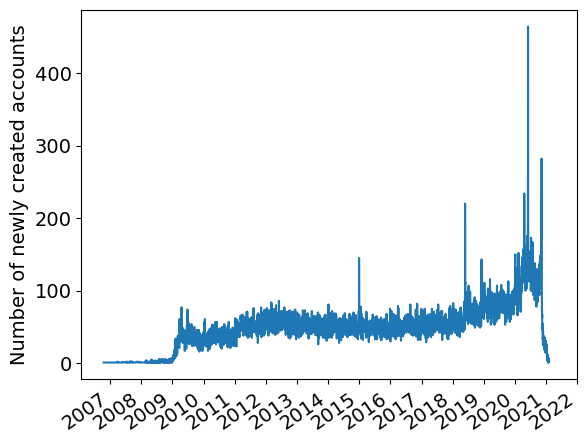

In [274]:
plt.plot(
    user_create_dates.index,
    user_create_dates)
plt.xticks(xs, x_labels, rotation=35, ha='right');
plt.ylabel("Number of newly created accounts")

# Tweet time vs user created time

In [197]:
len(tweet_df)

1098791

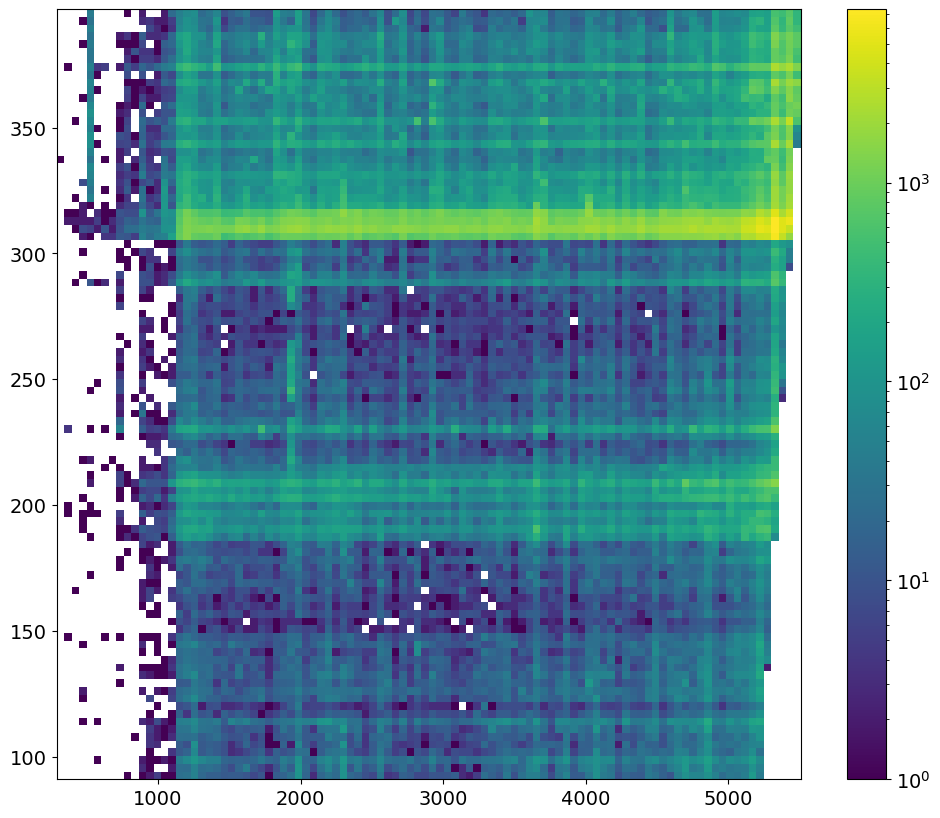

In [203]:
#fig = plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(figsize=(12, 10))
h = ax.hist2d(
    tweet_df.u_c_day,
    tweet_df.t_c_day,
    bins=100,
    norm='log'
);
plt.colorbar(h[3], ax=ax)

# Single tweets

In [139]:
tweet_df.query("tweet_type == 'retweet'").retweet_id.value_counts().head(10)

retweet_id
1325557443892551685    30608
1324752837117501440    10926
1325026847164407809     8669
1285800464458510337     8096
1324769261043228674     5378
1325088275581820928     5285
1323213746387488768     5175
1324858878631161862     3864
1324761591770980352     3615
1324773720582443011     3611
Name: count, dtype: int64

In [275]:
temp_df = tweet_df.query("retweet_id == '1325557443892551685'").copy()

In [276]:
len(temp_df)

30944

In [277]:
temp_df['tweet_rank'] = temp_df.created_at.rank()

Text(0.5, 0, 'Early retweeters <-Retweet rank -> Late retwetters')

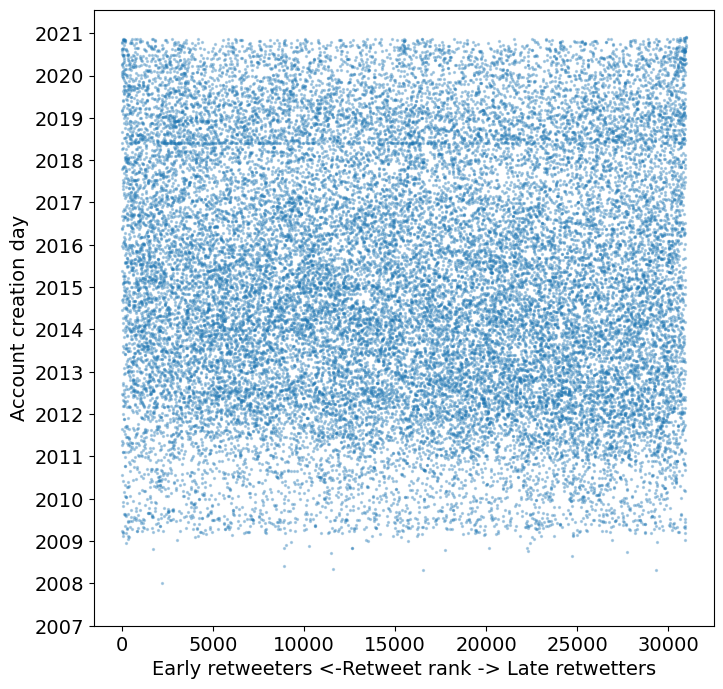

In [315]:
plt.figure(figsize=(8, 8))
zoom_in = temp_df#.query("u_c_day > 4528 or u_c_day < 4527")
plt.scatter(
    zoom_in.tweet_rank,
    zoom_in.u_c_day,
    s=2,
    alpha=0.3
)
plt.yticks(xs[:-1], x_labels[:-1]);
plt.ylabel("Account creation day")
plt.xlabel("Early retweeters <-Retweet rank -> Late retwetters")

#plt.gca().axhline(4527, color='red', alpha=.1                  , lw=4)

Text(0.5, 0, 'Early retweeters <-Retweet rank -> Late retwetters')

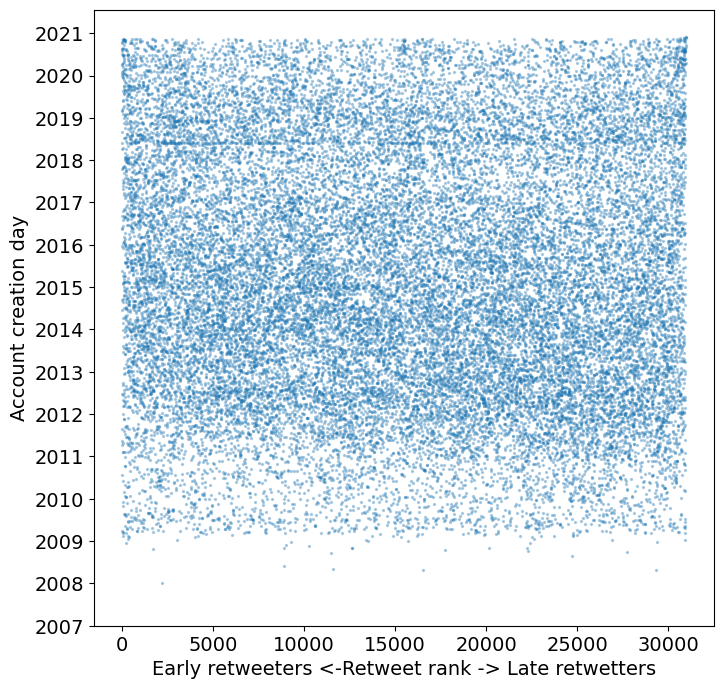

In [345]:
plt.figure(figsize=(8, 8))
zoom_in = temp_df.query("u_c_day > 4529 or u_c_day < 4528")
plt.scatter(
    zoom_in.tweet_rank,
    zoom_in.u_c_day,
    s=2,
    alpha=0.3
)
plt.yticks(xs[:-1], x_labels[:-1]);
plt.ylabel("Account creation day")
plt.xlabel("Early retweeters <-Retweet rank -> Late retwetters")

#plt.gca().axhline(4527, color='red', alpha=.1                  , lw=4)

# 4257

In [361]:
df_4257 = tweet_df.query("4527 < u_c_day < 4528 and retweet_id == '1325557443892551685'")[['tweet_id', 'source', 'user_id', 'user_created_at', 'screen_name', 'name', 'description']]#.drop_duplicates(subset=['user_id'])


In [362]:
len(df_4257)

83

In [352]:
df_4257.source.value_counts()

source
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      57
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    51
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                  4
Name: count, dtype: int64

In [309]:
len(df_4257)

9

In [306]:
df_4257['twitter_profile_link'] = 'https://twitter.com/i/user/' + df_4257['user_id']

In [307]:
df_4257.to_csv("cib_4257.csv", index=None)

In [367]:
df_4257.sample(1)

,tweet_id,source,user_id,user_created_at,screen_name,name,description
22424,1326277633265573902,"<a href=""http://twitter.com/download/iphone"" r...",1000109279527997450,2018-05-25 20:20:08,raquel_rdrg,raquel palmeira🌴,Lisbon📍18yrs


In [368]:
tweet_df.query("user_id == '1000109279527997450'")

,tweet_id,link,created_at,source,retweet_count,like_count,text,tweet_type,retweet_id,retweet_user_id,...,user_followers_count,user_friends_count,user_tweet_count,screen_name,name,verified,profile_image_url,description,u_c_day,t_c_day
22424,1326277633265573902,https://twitter.com/raquel_rdrg/status/1326277...,2020-11-10 21:36:43,"<a href=""http://twitter.com/download/iphone"" r...",0,0,RT @moviefan86: Johnny Depp was abused by Ambe...,retweet,1325557443892551685,3322798903,...,83,143,11612,raquel_rdrg,raquel palmeira🌴,False,http://pbs.twimg.com/profile_images/1342107168...,Lisbon📍18yrs,4527.847315,314.900498


In [173]:
df_4527.tweet_type.value_counts()

tweet_type
retweet     313
original     43
quote        22
Name: count, dtype: int64

In [175]:
df_4527.retweet_id.value_counts().head(10)

retweet_id
1325557443892551685    83
1289838254141739009    15
1325026847164407809    14
1323204849119408128     6
1346111359449239560     5
1285800464458510337     4
1325088275581820928     4
1324752837117501440     3
1347291530185342976     3
1343530116673118209     2
Name: count, dtype: int64

In [220]:
df_4527.query("retweet_id == '1346111359449239560'")

,tweet_id,link,created_at,source,retweet_count,like_count,text,tweet_type,retweet_id,retweet_user_id,...,user_followers_count,user_friends_count,user_tweet_count,screen_name,name,verified,profile_image_url,description,u_c_day,t_c_day
95230,1346584954680053761,https://twitter.com/__marianalapa/status/13465...,2021-01-05 22:30:46,"<a href=""http://twitter.com/download/iphone"" r...",0,0,RT @gabi_alpha7: Só sinto nojo\n#JusticeForJoh...,quote,1346111359449239560,1237910149760679937,...,49,225,3847,__marianalapa,mariana🙃,False,http://pbs.twimg.com/profile_images/1353386382...,None,4527,370
95549,1346555031877783553,https://twitter.com/nunomarmeleiro/status/1346...,2021-01-05 20:31:52,"<a href=""http://twitter.com/download/android"" ...",0,0,RT @claudiafromtb: Não sei como é que com tant...,quote,1346111359449239560,1237910149760679937,...,278,397,22348,nunomarmeleiro,𝙣𝙪𝙣𝙤,False,http://pbs.twimg.com/profile_images/1289316556...,DA LE | 19 | ISEP-LEI | @FCPorto | @ManUtd,4527,370
95594,1346550217395548161,https://twitter.com/inessoares_03/status/13465...,2021-01-05 20:12:44,"<a href=""http://twitter.com/download/iphone"" r...",0,0,"RT @Patricia_dias13: É só injusto, revoltante,...",quote,1346111359449239560,1237910149760679937,...,346,236,15626,inessoares_03,i,False,http://pbs.twimg.com/profile_images/1340781172...,ig:Ines_soares_,4527,370
95605,1346548979195138052,https://twitter.com/bnardoliveira/status/13465...,2021-01-05 20:07:48,"<a href=""http://twitter.com/download/iphone"" r...",0,0,"RT @Patricia_dias13: É só injusto, revoltante,...",quote,1346111359449239560,1237910149760679937,...,577,358,10191,bnardoliveira,oliveira,False,http://pbs.twimg.com/profile_images/1349656153...,Ig: bnardo_oliveira,4527,370
95608,1346548229933047809,https://twitter.com/bnardoliveira/status/13465...,2021-01-05 20:04:50,"<a href=""http://twitter.com/download/iphone"" r...",0,0,RT @gabi_alpha7: Só sinto nojo\n#JusticeForJoh...,quote,1346111359449239560,1237910149760679937,...,577,358,10191,bnardoliveira,oliveira,False,http://pbs.twimg.com/profile_images/1349656153...,Ig: bnardo_oliveira,4527,370
